In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install spacy -U
!python -m spacy download pl_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.5.0 which is incompatible.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-12 11:19:25.851461: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enab

In [3]:
import spacy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
df_redyk = pd.read_csv("/content/burza.csv", error_bad_lines=False)

In [6]:
nlp = spacy.load("pl_core_news_lg")

In [7]:
df_redyk

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Fri Jun 25 08:59:51 +0000 2021,burza,NaN,NaN,2,1408349207577219072,NaN,NaN,NaN,...,3161,580,20,NaN,Geopolityka z kraju i ze świata,z_swiata,7686,NaN,NaN,False
1,NaN,Fri Jun 25 09:00:50 +0000 2021,NaN,NaN,https://wiadomosci.radiozet.pl/Pogoda/Burza-na...,0,1408349455892586498,NaN,NaN,NaN,...,1117,1107,0,Koszalin,ℙ𝕚𝕠𝕥𝕣 ℙ𝕠ł𝕔𝕫𝕪𝕟𝕤𝕜𝕚 🇵🇱 🇪🇺 ♑,polczynski_,12508,NaN,NaN,False
2,NaN,Fri Jun 25 09:08:14 +0000 2021,NaN,NaN,NaN,0,1408351316162846726,KamillKania,1.408351e+18,1.107603e+09,...,825,582,9,Ivory Coast,Lizelow,lizelow,40676,NaN,NaN,False
3,NaN,Fri Jun 25 08:50:33 +0000 2021,IMGWlive IMGW burze Warszawa,NaN,NaN,0,1408346865846915075,NaN,NaN,NaN,...,148,1057,0,Warszawa,Grzegorz Jakubowski @europolitan@vivaldi.net,europolitan87,3520,NaN,http://facebook.com/europolitan87,False
4,NaN,Fri Jun 25 08:40:24 +0000 2021,Lubelszczyzna burza strażpożarna interwencja,NaN,https://ift.tt/3xQisPZ,0,1408344313059319811,NaN,NaN,NaN,...,258,18,2,Biłgoraj,Bilgorajska.pl,gbilgorajska,20796,NaN,http://www.bilgorajska.pl,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11668,NaN,Sun Jun 20 08:18:18 +0000 2021,NaN,NaN,NaN,13,1406526810150604803,DanielWachowiak,1.406472e+18,1.025131e+09,...,443,583,3,NaN,mohair zone 🇵🇱,mohair_zone,55382,NaN,NaN,False
11669,NaN,Sun Jun 20 05:33:10 +0000 2021,NaN,NaN,NaN,87,1406485253540257792,NaN,NaN,NaN,...,4766,860,9,"Kraków, Polska",o. Kamil,kam_k1993,27515,NaN,NaN,False
11670,NaN,Sun Jun 20 08:31:15 +0000 2021,NaN,NaN,NaN,0,1406530072371240960,przerwaodtwit,1.406530e+18,1.879540e+09,...,2494,2793,17,she/her,alia,przerwaodtwit,110974,NaN,NaN,False
11671,NaN,Sun Jun 20 05:15:10 +0000 2021,NaN,https://twitter.com/Elizabe42356835/status/140...,NaN,1,1406480723616452608,IWonnaAgharta,1.406478e+18,7.176940e+17,...,867,1142,0,NaN,Elizabeth Bennet,Elizabe42356835,3791,NaN,NaN,False


Część 1 - przetwarzanie i oczyszczanie danych

In [8]:
#Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
df_redyk["created_at"] = [elem.replace("Mon","Poniedziałek").replace("Tue","Wtorek").replace("Wed","Środa").replace("Thu","Czwartek").replace("Fri","Piątek").replace("Sat","Sobota").replace("Sun","Niedziela") for elem in df_redyk["created_at"]] 

In [9]:
df_redyk["created_at"]

0           Piątek Jun 25 08:59:51 +0000 2021
1           Piątek Jun 25 09:00:50 +0000 2021
2           Piątek Jun 25 09:08:14 +0000 2021
3           Piątek Jun 25 08:50:33 +0000 2021
4           Piątek Jun 25 08:40:24 +0000 2021
                         ...                 
11668    Niedziela Jun 20 08:18:18 +0000 2021
11669    Niedziela Jun 20 05:33:10 +0000 2021
11670    Niedziela Jun 20 08:31:15 +0000 2021
11671    Niedziela Jun 20 05:15:10 +0000 2021
11672    Niedziela Jun 20 07:15:26 +0000 2021
Name: created_at, Length: 11673, dtype: object

In [10]:
#Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
df_redyk["user_created_at"] = [elem.replace("Jan","01").replace("Feb","02").replace("Mar","03").replace("Apr","04").replace("May","05").replace("Jun","06") for elem in df_redyk["user_created_at"]] 
df_redyk["user_created_at"] = [elem.replace("Jul","07").replace("Aug","08").replace("Sep","09").replace("Oct","10").replace("Nov","11").replace("Dec","12") for elem in df_redyk["user_created_at"]] 

In [11]:
df_redyk["user_created_at"]

0        Tue 12 01 19:23:39 +0000 2020
1        Mon 09 01 18:49:46 +0000 2014
2        Sat 07 09 12:39:49 +0000 2016
3        Tue 04 26 15:44:18 +0000 2011
4        Sun 05 16 13:20:03 +0000 2010
                     ...              
11668    Fri 11 04 17:47:22 +0000 2016
11669    Mon 03 28 20:25:34 +0000 2016
11670    Wed 09 18 13:56:44 +0000 2013
11671    Wed 06 17 02:42:40 +0000 2020
11672    Sat 03 17 17:39:54 +0000 2012
Name: user_created_at, Length: 11673, dtype: object

In [16]:
#Pobierz wszystkie linki do tweetów i przekaż je do listy.
tweet_link = []
for elem in df_redyk['tweet_url']:
  if elem != None:
    tweet_link.append(elem)

  tweet_link = [x for x in tweet_link if x == x] #wyczyść puste

In [15]:
tweet_link

['https://twitter.com/z_swiata/status/1408349207577219072',
 'https://twitter.com/polczynski_/status/1408349455892586498',
 'https://twitter.com/lizelow/status/1408351316162846726',
 'https://twitter.com/europolitan87/status/1408346865846915075',
 'https://twitter.com/gbilgorajska/status/1408344313059319811',
 'https://twitter.com/_nudna_nazwa_28/status/1408338238260060167',
 'https://twitter.com/BartoszWojsa/status/1408351065951645701',
 'https://twitter.com/MarzenaZolkiew1/status/1408348551625728003',
 'https://twitter.com/tojaempe/status/1408346607297368066',
 'https://twitter.com/ADerewienko/status/1408349316058595331',
 'https://twitter.com/wojciechce/status/1408335905882992644',
 'https://twitter.com/Pani_Ciemnosci/status/1408342977555185664',
 'https://twitter.com/EdmundKowalski5/status/1408335775859720193',
 'https://twitter.com/coolm4x/status/1408344891780911110',
 'https://twitter.com/szczurzamordka0/status/1408348039769694210',
 'https://twitter.com/europolitan87/status/1408

In [17]:
#Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)
tweet_urls = []

for elem in df_redyk['urls']:
  if elem != None:
    tweet_urls.append(elem)

  tweet_urls = [x for x in tweet_urls if x == x] #wyczyść puste

In [18]:
tweet_urls

['https://wiadomosci.radiozet.pl/Pogoda/Burza-nad-Warszawa-dzisiaj.-Sciana-deszczu-wichura-porywala-ludzi-ZDJECIA',
 'https://ift.tt/3xQisPZ',
 'https://www.se.pl/slask/slaskie-piekny-pies-uciekal-przed-burza-znalazl-schronienie-w-policyjnym-radiowozie-aa-LgDJ-qkRY-JQmK.html',
 'https://edition.cnn.com/2021/06/24/middleeast/palestinian-activist-death-intl/index.html',
 'https://www.tvp.info/54522581/poslanki-ko-oburzone-koszulka-rpd-mikolaja-pawlaka-monika-rosa-i-barbara-nowacka-mial-grafike-z-nienarodzonym-dzieckiem-burza-w-sieci-komentarze-internautow',
 'https://obserwatorzy.info',
 'http://dlvr.it/S2Qws1',
 'https://lubiehrubie.pl/wiadomosci/burza-nad-hrubieszowem-zdjecia/',
 'https://obserwatorzy.info',
 'https://www.tvp.info/54522581/poslanki-ko-oburzone-koszulka-rpd-mikolaja-pawlaka-monika-rosa-i-barbara-nowacka-mial-grafike-z-nienarodzonym-dzieckiem-burza-w-sieci-komentarze-internautow',
 'http://dlvr.it/S2Qws1',
 'https://www.tvp.info/54523405/gigant-ktory-nie-urodzil-sie-w-od

In [19]:
#Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media)
tweet_media = []

for elem in df_redyk["media"]:
  if elem != None:
    tweet_media.append(elem)

  tweet_media = [x for x in tweet_media if x == x] #wyczyść puste

In [20]:
tweet_media

['https://twitter.com/BartoszWojsa/status/1408351065951645701/photo/1',
 'https://twitter.com/ADerewienko/status/1408349316058595331/photo/1',
 'https://twitter.com/twoghosts_xx_/status/1408012906973872129/photo/1',
 'https://twitter.com/OnetWiadomosci/status/1408346009957126147/photo/1',
 'https://twitter.com/lubiehrubie/status/1408341175879282689/photo/1',
 'https://twitter.com/Janusz33382894/status/1408343816126537728/photo/1',
 'https://twitter.com/twoghosts_xx_/status/1408012906973872129/photo/1',
 'https://twitter.com/SOB_pl/status/1408344637748744196/photo/1',
 'https://twitter.com/OnetWiadomosci/status/1408346009957126147/photo/1',
 'https://twitter.com/stary_zrzeda/status/1408342662281846788/photo/1',
 'https://twitter.com/b4rrtt/status/1408184224025300998/photo/1',
 'https://twitter.com/psse_lubliniec/status/1408344504894099457/photo/1',
 'https://twitter.com/jakubgierczuk/status/1408333695271030788/photo/1',
 'https://twitter.com/jakubgierczuk/status/1408333695271030788/phot

In [22]:
#Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords

def remove_stopwords(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return " ".join(tokens)

df_redyk['text_without_stopwords'] = df_redyk["text"].apply(remove_stopwords)

In [23]:
df_redyk

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
0,NaN,Piątek Jun 25 08:59:51 +0000 2021,burza,NaN,NaN,2,1408349207577219072,NaN,NaN,NaN,...,580,20,NaN,Geopolityka z kraju i ze świata,z_swiata,7686,NaN,NaN,False,Minionej nocy Polsce straż pożarna odnotowała ...
1,NaN,Piątek Jun 25 09:00:50 +0000 2021,NaN,NaN,https://wiadomosci.radiozet.pl/Pogoda/Burza-na...,0,1408349455892586498,NaN,NaN,NaN,...,1107,0,Koszalin,ℙ𝕚𝕠𝕥𝕣 ℙ𝕠ł𝕔𝕫𝕪𝕟𝕤𝕜𝕚 🇵🇱 🇪🇺 ♑,polczynski_,12508,NaN,NaN,False,Niesamowite . . . https://t.co/DIo8J7GFlK
2,NaN,Piątek Jun 25 09:08:14 +0000 2021,NaN,NaN,NaN,0,1408351316162846726,KamillKania,1.408351e+18,1.107603e+09,...,582,9,Ivory Coast,Lizelow,lizelow,40676,NaN,NaN,False,"@KamillKania @michukolek Pamiętam , chyba prze..."
3,NaN,Piątek Jun 25 08:50:33 +0000 2021,IMGWlive IMGW burze Warszawa,NaN,NaN,0,1408346865846915075,NaN,NaN,NaN,...,1057,0,Warszawa,Grzegorz Jakubowski @europolitan@vivaldi.net,europolitan87,3520,NaN,http://facebook.com/europolitan87,False,21:10 # IMGWlive \n\n Warszawie kolory pomarań...
4,NaN,Piątek Jun 25 08:40:24 +0000 2021,Lubelszczyzna burza strażpożarna interwencja,NaN,https://ift.tt/3xQisPZ,0,1408344313059319811,NaN,NaN,NaN,...,18,2,Biłgoraj,Bilgorajska.pl,gbilgorajska,20796,NaN,http://www.bilgorajska.pl,False,Trwa usuwanie skutków nawałnic # Lubelszczyz...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11668,NaN,Niedziela Jun 20 08:18:18 +0000 2021,NaN,NaN,NaN,13,1406526810150604803,DanielWachowiak,1.406472e+18,1.025131e+09,...,583,3,NaN,mohair zone 🇵🇱,mohair_zone,55382,NaN,NaN,False,@DanielWachowiak śpimy . Obudzimy burza . Oby ...
11669,NaN,Niedziela Jun 20 05:33:10 +0000 2021,NaN,NaN,NaN,87,1406485253540257792,NaN,NaN,NaN,...,860,9,"Kraków, Polska",o. Kamil,kam_k1993,27515,NaN,NaN,False,""" morzu , wielka burza , Jezus łodzi "" 🤗 \n Ra..."
11670,NaN,Niedziela Jun 20 08:31:15 +0000 2021,NaN,NaN,NaN,0,1406530072371240960,przerwaodtwit,1.406530e+18,1.879540e+09,...,2793,17,she/her,alia,przerwaodtwit,110974,NaN,NaN,False,"pisnęłam HAHAHA "" aaaa burza XD """
11671,NaN,Niedziela Jun 20 05:15:10 +0000 2021,NaN,https://twitter.com/Elizabe42356835/status/140...,NaN,1,1406480723616452608,IWonnaAgharta,1.406478e+18,7.176940e+17,...,1142,0,NaN,Elizabeth Bennet,Elizabe42356835,3791,NaN,NaN,False,"@IWonnaAgharta , , burza .... niedowartościowa..."


Część 2 - eksploracyjna analiza danych

In [28]:
#Wypisz top5 tweetów z największa liczbą polubień.
df_sort_by_like = pd.DataFrame(df_redyk, columns =['favorite_count', 'text'])
df_sort_by_like.sort_values(by='favorite_count', ascending=False).head(5)

#Dla wypisania tylko tekstu:
#df_sort_by_like = df_sort_by_like.sort_values(by='favorite_count', ascending=False).head(5)
#df_sort_by_like['text']

,favorite_count,text
8770,3797,ale bd burza
5687,2481,"Nad Warszawą wielka burza, jak u Was sytuacja? ⛈"
8793,2267,zawsze gdy idzie burza to w moim domu jest pos...
8597,2170,Nikt:\nKompletnie nikt:\nMarvelowcy gdy widzą ...
4979,1966,"Jestem pod wrażeniem tego widoku, to #burza na..."


In [29]:
#Wypisz top5 tweetów z największa liczbą retweetów.
df_sort_by_retweet = pd.DataFrame(df_redyk, columns =['retweet_count', 'text'])
df_sort_by_retweet.sort_values(by='retweet_count', ascending=False).head(5)

,retweet_count,text
1731,231,Nikt:\nKompletnie nikt:\nMarvelowcy gdy widzą ...
7719,231,Nikt:\nKompletnie nikt:\nMarvelowcy gdy widzą ...
7652,231,Nikt:\nKompletnie nikt:\nMarvelowcy gdy widzą ...
7667,231,Nikt:\nKompletnie nikt:\nMarvelowcy gdy widzą ...
7669,231,Nikt:\nKompletnie nikt:\nMarvelowcy gdy widzą ...


In [30]:
#Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).
df_sensitive = pd.DataFrame(df_redyk, columns =['possibly_sensitive', 'text'])
df_sensitive = df_sensitive[df_sensitive['possibly_sensitive'] == False] 
df_sensitive['text']

1               Niesamowite...     https://t.co/DIo8J7GFlK
4        Trwa usuwanie skutków nawałnic  #Lubelszczyzna...
6        Mały gest, a cieszy. Policjanci w #TarnowskieG...
9        @SitdamDamian ☺️❤️✌🏼 I wzajemnie. Żeby burza b...
10       W Palestynie burza po tym, jak w trakcie bruta...
                               ...                        
11640    @uItraser czekaj jednak jest burza od wtorku t...
11650    @tarni_b @podkarpatka #JEDNOCZEŚNIE  FRANCUZI ...
11653    Dzien dobry  ,niedzielne przedpołudnie ,upalne...
11662    My już ma miejscu.Cisza przed burzą🇪🇸-🇵🇱\n@spo...
11671    @IWonnaAgharta Dobrze,, że tylko burza....a gd...
Name: text, Length: 2066, dtype: object

In [31]:
#Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at)

#1 znajdź użytkownika
df_sort_by_created = pd.DataFrame(df_redyk, columns =['user_name', 'user_created_at', 'user_id','text'])
#df_sort_by_created.sort_values(by='user_created_at', ascending=False).head(1)  #user, data dodania, jego id, 1 tweet

#2 zapisz jego id
user_created_id = df_sort_by_created.sort_values(by='user_created_at', ascending=False).head(1)['user_id']
user_created_id = list(user_created_id)[0]

#3 wyświetl jego tweety
df_sort_by_created = df_sort_by_created[df_sort_by_created['user_id'] == user_created_id] 
df_sort_by_created['text']

5148    burza u mnie bedzie a jestem sama w domu
Name: text, dtype: object

In [32]:
#Wyświetl tweety użytkownika, który ma najwięcej followersów.

#1 znajdź użytkownika
df_sort_by_followers = pd.DataFrame(df_redyk, columns =['user_name', 'user_followers_count','text', 'user_id'])
#df_sort_by_followers.sort_values(by='user_followers_count', ascending=False).head(1)  #user, liczba follow, jego id, 1 tweet

#2 zapisz jego id
user_followers_id = df_sort_by_followers.sort_values(by='user_followers_count', ascending=False).head(1)["user_id"]
user_followers_id = list(user_followers_id)[0]

#3 wyświetl jego tweety
df_sort_by_followers = df_sort_by_followers[df_sort_by_followers['user_id'] == user_followers_id] 
df_sort_by_followers['text']

289      #UWAGA | Nad Polską pojawiają się wyładowania ...
2020     Burza z namiastką trąby powietrznej zrobiła sp...
2338     Po godzinie 20 ciemne chmury nadciągnęły nad m...
5318     [AKTUALIZACJA] Jak informuje Mateusz Szmelter ...
6857     #UWAGA | Środa to kolejny dzień z niebezpieczn...
9328     W szkole na poznańskim osiedlu Pod Lipami zawa...
9459     Nad Polską na froncie pojawiają się wyładowani...
11062    Poniedziałek przyniósł gwałtowną aurę. W Jelen...
11143    Sprawdź, gdzie jest burza, i jaka jest aktualn...
11290    Aż 18 pojazdów zderzyło się w sobotę na autost...
11599    #UWAGA |  Sprawdź, gdzie jest burza, i śledź a...
Name: text, dtype: object

In [33]:
#Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)
df_verified = pd.DataFrame(df_redyk, columns =['user_verified', 'user_name'])
df_verified = df_verified[df_verified['user_verified'] == True] 
df_verified['user_name']

10       Wojciech Cegielski (Polskie Radio / Podcast Św...
122                                            tvp.info 🇵🇱
242                                            Gabi Karlen
289                                                  tvn24
300                                            tvp.info 🇵🇱
                               ...                        
11465                                       Radio ZET NEWS
11475                                          tvp.info 🇵🇱
11565                                          tvp.info 🇵🇱
11599                                                tvn24
11638                                          Michał Boni
Name: user_name, Length: 72, dtype: object

In [34]:
#Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu

pon = 0
wt = 0
śr = 0
czw = 0
pt = 0
sob = 0
nie = 0
tydzien = {}


for elem in df_redyk['created_at']:
  if re.findall ("Poniedziałek", elem):
    pon = pon + 1
  elif re.findall ("Wtorek", elem):
    wt = wt + 1
  elif re.findall ("Środa", elem):
    śr = śr + 1
  elif re.findall ("Czwartek", elem):
    czw = czw + 1
  elif re.findall ("Piątek", elem):
    pt = pt + 1
  elif re.findall ("Sobota", elem):
    sob = sob + 1
  elif re.findall ("Niedziela", elem):
    nie = nie + 1

tydzien["Poniedziałek"] = pon
tydzien["Wtorek"] = wt
tydzien["Środa"] = śr
tydzien["Czwartek"] = czw
tydzien["Piątek"] = pt
tydzien["Sobota"] = sob
tydzien["Niedziela"] = nie

print("Najczęściej posty publikowano w:", sorted(tydzien)[0])

Najczęściej posty publikowano w: Czwartek


Część 3 - przetwarzanie języka naturalnego

In [42]:
#Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons
def find_persons(text):
    doc = nlp(text)
    ents = [ent.lemma_ for ent in doc.ents if ent.label_ == "persName"]
    return " ".join(ents)

df_redyk['persons'] = df_redyk["text"].apply(find_persons)

In [40]:
#Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places
def find_places(text):
    doc = nlp(text)
    ents = [ent.lemma_ for ent in doc.ents if ent.label_ == "placeName"]
    return " ".join(ents)

df_redyk['places'] = df_redyk["text"].apply(find_places)

In [44]:
#Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations
def find_organizations(text):
    doc = nlp(text)
    ents = [ent.lemma_ for ent in doc.ents if ent.label_ == "orgName"]
    return " ".join(ents)

df_redyk['organizations'] = df_redyk["text"].apply(find_organizations)

In [45]:
df_redyk

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords,persons,places,organizations
0,NaN,Piątek Jun 25 08:59:51 +0000 2021,burza,NaN,NaN,2,1408349207577219072,NaN,NaN,NaN,...,Geopolityka z kraju i ze świata,z_swiata,7686,NaN,NaN,False,Minionej nocy Polsce straż pożarna odnotowała ...,,Polska,
1,NaN,Piątek Jun 25 09:00:50 +0000 2021,NaN,NaN,https://wiadomosci.radiozet.pl/Pogoda/Burza-na...,0,1408349455892586498,NaN,NaN,NaN,...,ℙ𝕚𝕠𝕥𝕣 ℙ𝕠ł𝕔𝕫𝕪𝕟𝕤𝕜𝕚 🇵🇱 🇪🇺 ♑,polczynski_,12508,NaN,NaN,False,Niesamowite . . . https://t.co/DIo8J7GFlK,,,
2,NaN,Piątek Jun 25 09:08:14 +0000 2021,NaN,NaN,NaN,0,1408351316162846726,KamillKania,1.408351e+18,1.107603e+09,...,Lizelow,lizelow,40676,NaN,NaN,False,"@KamillKania @michukolek Pamiętam , chyba prze...",,Wiednie,@KamillKanie
3,NaN,Piątek Jun 25 08:50:33 +0000 2021,IMGWlive IMGW burze Warszawa,NaN,NaN,0,1408346865846915075,NaN,NaN,NaN,...,Grzegorz Jakubowski @europolitan@vivaldi.net,europolitan87,3520,NaN,http://facebook.com/europolitan87,False,21:10 # IMGWlive \n\n Warszawie kolory pomarań...,,Warszawa Warszawa,IMGW
4,NaN,Piątek Jun 25 08:40:24 +0000 2021,Lubelszczyzna burza strażpożarna interwencja,NaN,https://ift.tt/3xQisPZ,0,1408344313059319811,NaN,NaN,NaN,...,Bilgorajska.pl,gbilgorajska,20796,NaN,http://www.bilgorajska.pl,False,Trwa usuwanie skutków nawałnic # Lubelszczyz...,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11668,NaN,Niedziela Jun 20 08:18:18 +0000 2021,NaN,NaN,NaN,13,1406526810150604803,DanielWachowiak,1.406472e+18,1.025131e+09,...,mohair zone 🇵🇱,mohair_zone,55382,NaN,NaN,False,@DanielWachowiak śpimy . Obudzimy burza . Oby ...,,,KK
11669,NaN,Niedziela Jun 20 05:33:10 +0000 2021,NaN,NaN,NaN,87,1406485253540257792,NaN,NaN,NaN,...,o. Kamil,kam_k1993,27515,NaN,NaN,False,""" morzu , wielka burza , Jezus łodzi "" 🤗 \n Ra...",Jezus,,
11670,NaN,Niedziela Jun 20 08:31:15 +0000 2021,NaN,NaN,NaN,0,1406530072371240960,przerwaodtwit,1.406530e+18,1.879540e+09,...,alia,przerwaodtwit,110974,NaN,NaN,False,"pisnęłam HAHAHA "" aaaa burza XD """,,,
11671,NaN,Niedziela Jun 20 05:15:10 +0000 2021,NaN,https://twitter.com/Elizabe42356835/status/140...,NaN,1,1406480723616452608,IWonnaAgharta,1.406478e+18,7.176940e+17,...,Elizabeth Bennet,Elizabe42356835,3791,NaN,NaN,False,"@IWonnaAgharta , , burza .... niedowartościowa...",,,


Część 4 - rozwiązywanie problemów/umiejętność interpretowania dokumentacji

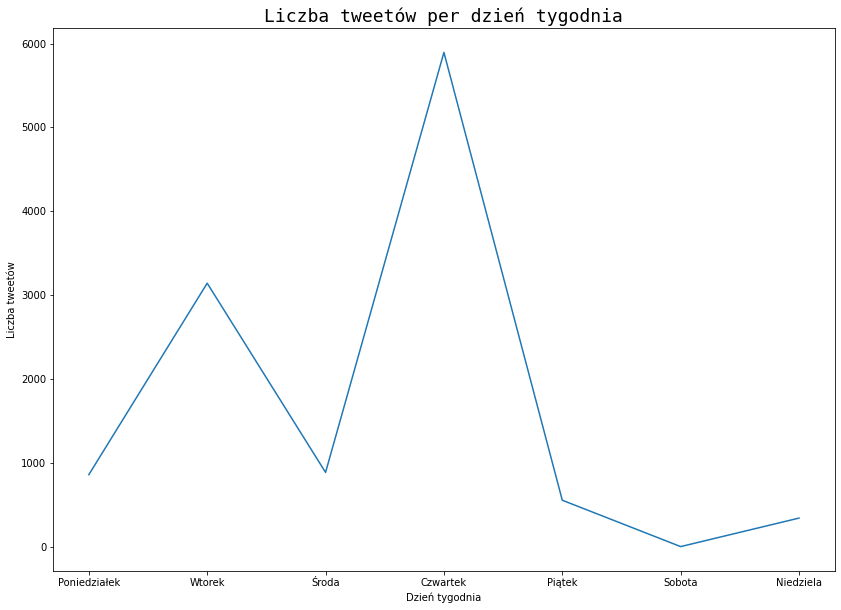

In [46]:
#Wykorzystując pakiet matplotlib wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia

#1 pobierz klucze
list_of_keys = [key for key in tydzien]

#2 pobierz wartości
list_of_values = [tydzien[key] for key in tydzien]

#3 rysuj wykres
plt.figure(figsize=(14, 10)) #rozmiar wykresu
plt.plot(list_of_keys, list_of_values) #dane
plt.title('Liczba tweetów per dzień tygodnia', fontdict={'fontname': 'monospace', 'fontsize': 18})
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba tweetów')

plt.show()